Data Loading and Initial Exploration

In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/content/Bike Sharing Dataset.csv'
data = pd.read_csv(file_path)

print("First few rows of the dataset:")
print(data.head())

print("\nData Info:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe(include='all'))

print("\nMissing Values Check:")
print(data.isnull().sum())

First few rows of the dataset:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  16

Data Cleaning and Preprocessing

In [3]:
from sklearn.preprocessing import MinMaxScaler


numerical_cols = ['temp', 'atemp', 'hum', 'windspeed']
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

categorical_cols = ['holiday', 'weekday', 'workingday', 'weathersit']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


data['total_users'] = data['casual'] + data['registered']
data.drop(['casual', 'registered'], axis=1, inplace=True)


print("Preprocessed Data Sample:")
print(data.head())

print("\nColumn Names:")
print(data.columns)

Preprocessed Data Sample:
   instant      dteday  season  yr  mnth      temp     atemp       hum  \
0        1  01-01-2018       1   0     1  0.355170  0.373517  0.828620   
1        2  02-01-2018       1   0     1  0.379232  0.360541  0.715771   
2        3  03-01-2018       1   0     1  0.171000  0.144830  0.449638   
3        4  04-01-2018       1   0     1  0.175530  0.174649  0.607131   
4        5  05-01-2018       1   0     1  0.209120  0.197158  0.449313   

   windspeed   cnt  ...  weekday_1  weekday_2  weekday_3  weekday_4  \
0   0.284606   985  ...      False      False      False      False   
1   0.466215   801  ...      False      False      False      False   
2   0.465740  1349  ...       True      False      False      False   
3   0.284297  1562  ...      False       True      False      False   
4   0.339143  1600  ...      False      False       True      False   

   weekday_5  weekday_6  workingday_1  weathersit_2  weathersit_3  total_users  
0      False       Tr

Visualization

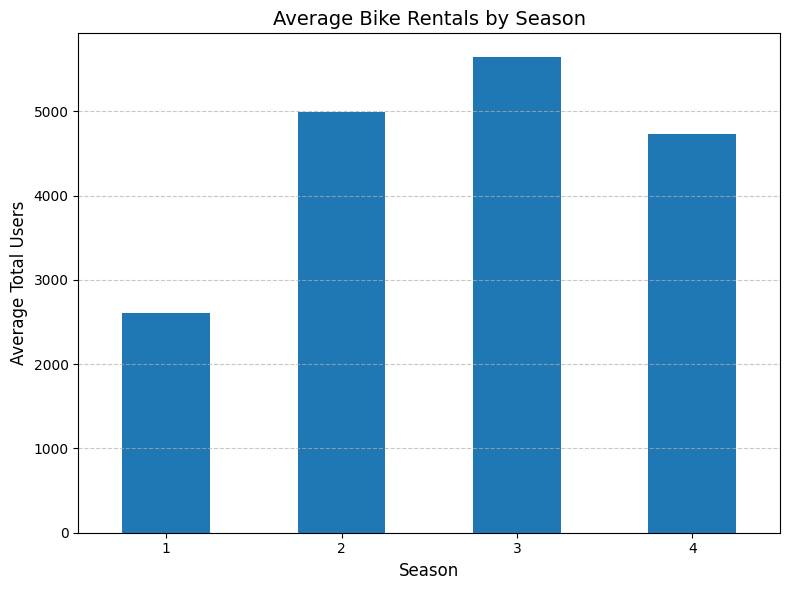

In [4]:
import matplotlib.pyplot as plt

def plot_bar_chart(data):
    """
    Creating a bar chart comparing total bike rentals across seasons.
    """

    season_rentals = data.groupby('season')['total_users'].mean()

    # Plot the bar chart
    plt.figure(figsize=(8, 6))
    season_rentals.plot(kind='bar')
    plt.title('Average Bike Rentals by Season', fontsize=14)
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Average Total Users', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Call the function
plot_bar_chart(data)


Relational Graph (Scatter Plot)

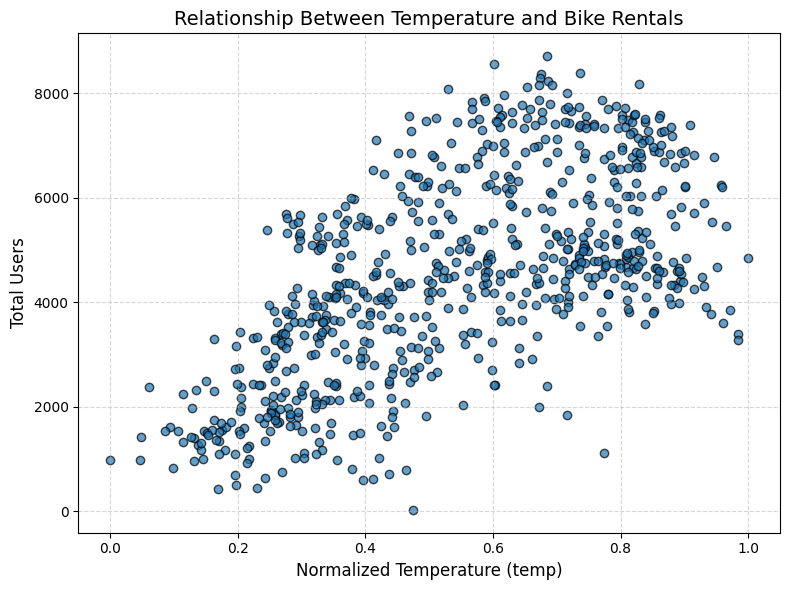

In [5]:
def plot_scatter(data):
    """
    Create a scatter plot showing the relationship between temperature and total bike rentals.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(data['temp'], data['total_users'], alpha=0.7, edgecolor='k')
    plt.title('Relationship Between Temperature and Bike Rentals', fontsize=14)
    plt.xlabel('Normalized Temperature (temp)', fontsize=12)
    plt.ylabel('Total Users', fontsize=12)
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()

# Call the function
plot_scatter(data)

Statistical Graph (Boxplot)

<ipython-input-6-765ea930aef2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit_2', y='total_users', data=data, palette='Set2')


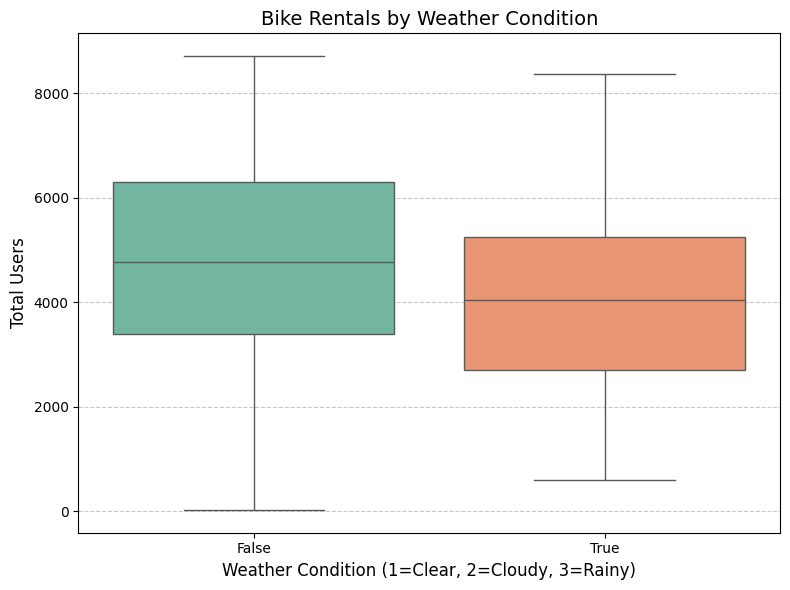

In [6]:
import seaborn as sns

def plot_boxplot(data):
    """
    Create a boxplot comparing the distribution of bike rentals across weather conditions.
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='weathersit_2', y='total_users', data=data, palette='Set2')
    plt.title('Bike Rentals by Weather Condition', fontsize=14)
    plt.xlabel('Weather Condition (1=Clear, 2=Cloudy, 3=Rainy)', fontsize=12)
    plt.ylabel('Total Users', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Call the function
plot_boxplot(data)

Clustering Analysis

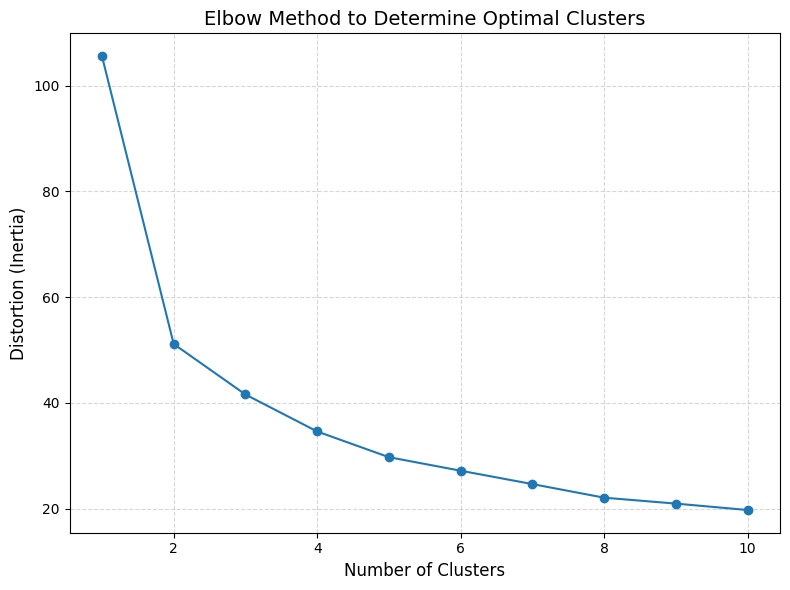

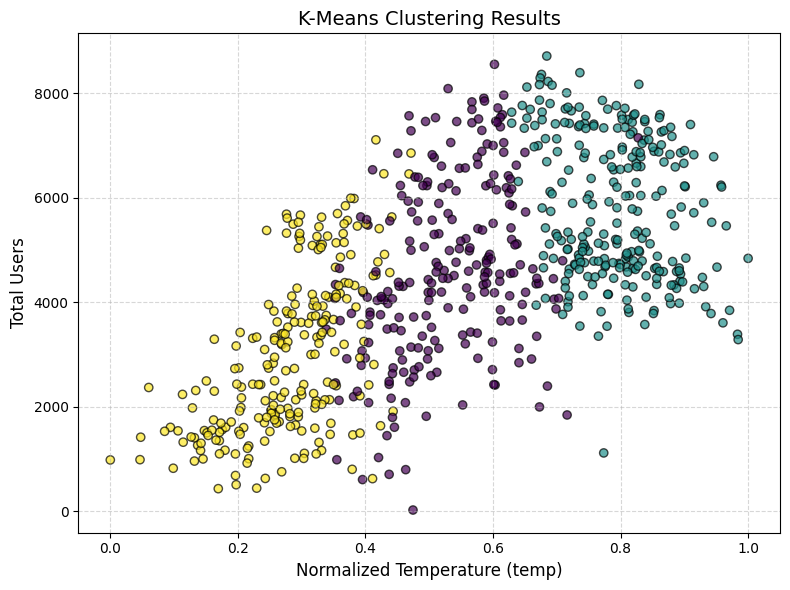

In [7]:
from sklearn.cluster import KMeans
import numpy as np

def perform_clustering(data):
    """
    Perform k-means clustering on numerical features.
    """
    # Select features for clustering
    clustering_features = ['temp', 'atemp', 'hum', 'windspeed']
    X = data[clustering_features]

    # Use Elbow Method to find optimal number of clusters
    distortions = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    # Plot Elbow Method results
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), distortions, marker='o')
    plt.title('Elbow Method to Determine Optimal Clusters', fontsize=14)
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('Distortion (Inertia)', fontsize=12)
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()

    # Perform k-means clustering with the optimal number of clusters (e.g., k=3)
    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    data['cluster'] = kmeans.fit_predict(X)

    # Plot clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(data['temp'], data['total_users'], c=data['cluster'], cmap='viridis', alpha=0.7, edgecolor='k')
    plt.title('K-Means Clustering Results', fontsize=14)
    plt.xlabel('Normalized Temperature (temp)', fontsize=12)
    plt.ylabel('Total Users', fontsize=12)
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()

# Call the function
perform_clustering(data)

Regression Analysis (Line Fitting)

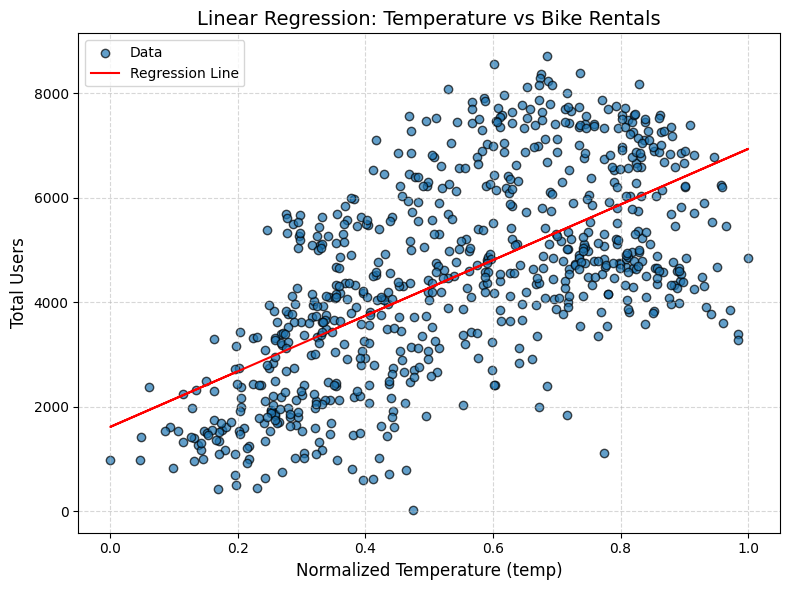

Regression Coefficient (Slope): 5321.131314287556
Intercept: 1614.0979257627287
Mean Squared Error (MSE): 2271315.50
R² Score: 0.39


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def perform_regression(data):
    """
    Perform linear regression on temperature and total bike rentals.
    """
    # Prepare data for regression
    X = data[['temp']]  # Independent variable
    y = data['total_users']  # Dependent variable

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict values
    y_pred = model.predict(X)

    # Plot the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, alpha=0.7, label='Data', edgecolor='k')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.title('Linear Regression: Temperature vs Bike Rentals', fontsize=14)
    plt.xlabel('Normalized Temperature (temp)', fontsize=12)
    plt.ylabel('Total Users', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()

    # Display regression metrics
    print(f"Regression Coefficient (Slope): {model.coef_[0]}")
    print(f"Intercept: {model.intercept_}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y, y_pred):.2f}")
    print(f"R² Score: {r2_score(y, y_pred):.2f}")

# Call the function
perform_regression(data)

Future Prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Future Predictions:
   Normalized Temperature  Predicted Total Users
0                     0.2                   2678
1                     0.4                   3742
2                     0.6                   4806
3                     0.8                   5871
4                     1.0                   6935


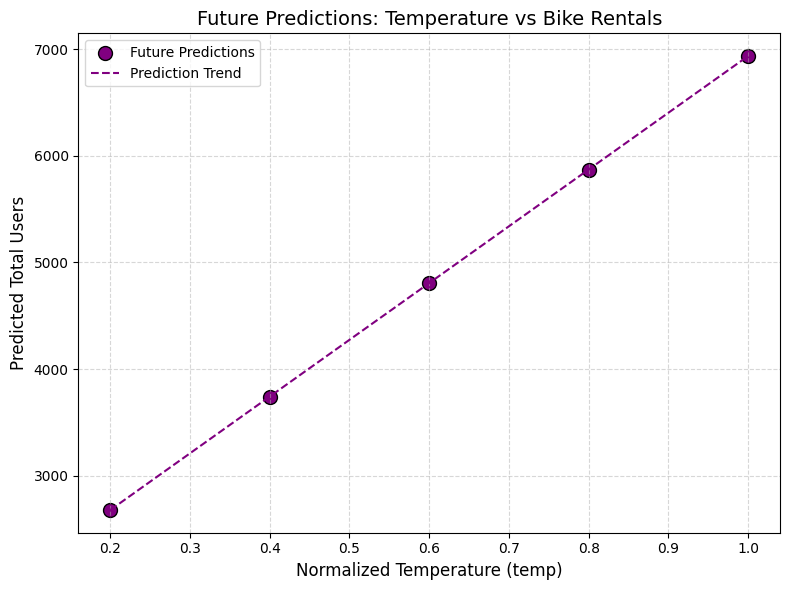

In [9]:
def predict_future_values(model):
    """
    Use the regression model to predict total bike rentals for future temperatures.
    """
    # Define future temperature values (normalized scale: 0 to 1)
    future_temps = [[0.2], [0.4], [0.6], [0.8], [1.0]]  # Example values
    predictions = model.predict(future_temps)

    # Create a DataFrame to display predictions
    future_data = pd.DataFrame({
        'Normalized Temperature': [temp[0] for temp in future_temps],
        'Predicted Total Users': predictions.astype(int)
    })

    print("Future Predictions:")
    print(future_data)

    # Visualize future predictions
    plt.figure(figsize=(8, 6))
    plt.scatter(future_data['Normalized Temperature'], future_data['Predicted Total Users'],
                color='purple', s=100, label='Future Predictions', edgecolor='k')
    plt.plot(future_data['Normalized Temperature'], future_data['Predicted Total Users'],
             color='purple', linestyle='--', label='Prediction Trend')
    plt.title('Future Predictions: Temperature vs Bike Rentals', fontsize=14)
    plt.xlabel('Normalized Temperature (temp)', fontsize=12)
    plt.ylabel('Predicted Total Users', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.5, linestyle='--')
    plt.tight_layout()
    plt.show()

# Ensure the regression model is trained
model = LinearRegression()
X = data[['temp']]  # Independent variable
y = data['total_users']  # Dependent variable
model.fit(X, y)

# Call the prediction function
predict_future_values(model)
